<a href="https://colab.research.google.com/github/Steven-Macas/ArbolDecision/blob/main/housing_SAA_stevenMacas_Arbol_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de aprendizaje supervisado**

---

## Árbol de Decisión

1. https://www.kaggle.com/yasserh/wine-quality-dataset . Clasificación de la calidad del vino según
alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de
datos sobre unos vino y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en
clasificar el vino en concreto en su clase de calidad (valores discretos del cero al 10)

2. https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Clasificación binaria. El
objetivo es clasificar entre presencia de enfermedad del corazón o no a partir de una serie de atributos
(edad, sexo, colesterol, etc.). Para ello el dataset contiene una serie de datos pacientes etiquetados si
tienen enfermedad o no.

3. https://www.kaggle.com/schirmerchad/bostonhoustingmlnd. Predicción de precios de las casas de
Boston. El dataset contiene una serie de datos de casas. El objetivo es, dada una serie de parámetros,
predecir el precio que debe tener la casa (MEDV).

4. https://www.kaggle.com/marklvl/bike-sharing-dataset. Predicción de número de bicicletas alquiladas
por cada hora. El dataset contiene una serie de datos como temperatura, humedad, si es día laborable,
etc. El objetivo es predecir cuantas bicicletas se van a alquilar dependiendo de esa serie de parámetros.

Para cada uno de ellos realizar un documento de google colab con los siguientes epígrafes y tareas:


---


A Importación de librerías necesarias


---



B Preproceso

◦ Importación de los datos del dataset

◦ Mostrar las primeras y últimas filas del dataframe importado

◦ Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

◦ Mostrar un mapa de calor que indique la correlación entre variables

◦ Seleccionar las características a tener en cuenta en el estudio

◦ Separar datos entre datos de entrada y etiquetas (resultados)

◦ Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)


---



C Entrenamiento y predicción

◦ Elegir, instanciar (eligiendo unos valores concretos, por ejemplo profundidad del árbol 3) y entrenar el modelo

◦ Realizar una predicción con los datos de prueba

◦ Mostrar el árbol de decisión resultante

◦  Mostrar la importancia de cada atributo en el árbol resultante

◦ Intenta guardar el modelo de predicción ya entrenado usando dumpo:

*https://scikit-learn.org/stable/modules/model_persistence.html*

---


D Evaluación

◦Para los problemas de clasificación

*   Mostrar el porcentaje de elementos correctamente clasificados
*   Mostrar la predicción realizada (imprimir la variable con la predicción)
*   Representar gráficamente la clasificación obtenida (matriz de confusión)

◦Para los problemas de regresión

*   Mostrar el error cuadrático medio (mean_squared_error)
*   Mostrar el error absoluto medio (mean_absolute_error)
*   Representar gráficamente los valores predichos con los valores reales

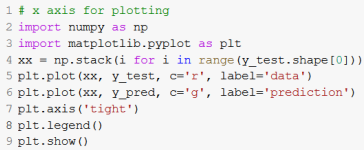

---


E Optimización de hiperparámetros

◦  Calcula la combinación de parámetros óptima (profundidad de árbol y criterio. Para ello realiza ejecuciones con cada uno de los valores del criterio para los valores de profundidad de árbol de 1 a 15

◦Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits = 5). Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)), como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

◦Finalmente los parámetros elegidos serán los que den mejor media de esas medidas anteriormente nombradas.

◦ Una vez obtenidos esos parámetros óptimos los aplicaremos al problema en cuestión y mostraremos los resultados.

---

# **A** -Importación de librerías

In [ ]:
#Importamos las librerias necesarias
import pydot #DecisionTree
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree #DecisionTree
from io import StringIO #DecisionTree
import matplotlib.pyplot as plt #Para el mapa de calor, hacer celdas grandes
from IPython.display import Image #DecisionTree
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier #DecisionTree
from sklearn.tree import DecisionTreeRegressor #DecisionTree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
import statistics

---


# **B** - Preproceso

In [ ]:
data = pd.read_csv('housing.csv') #Dataset de las casas



---



In [ ]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
data.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [ ]:
data.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object



---



In [ ]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


---

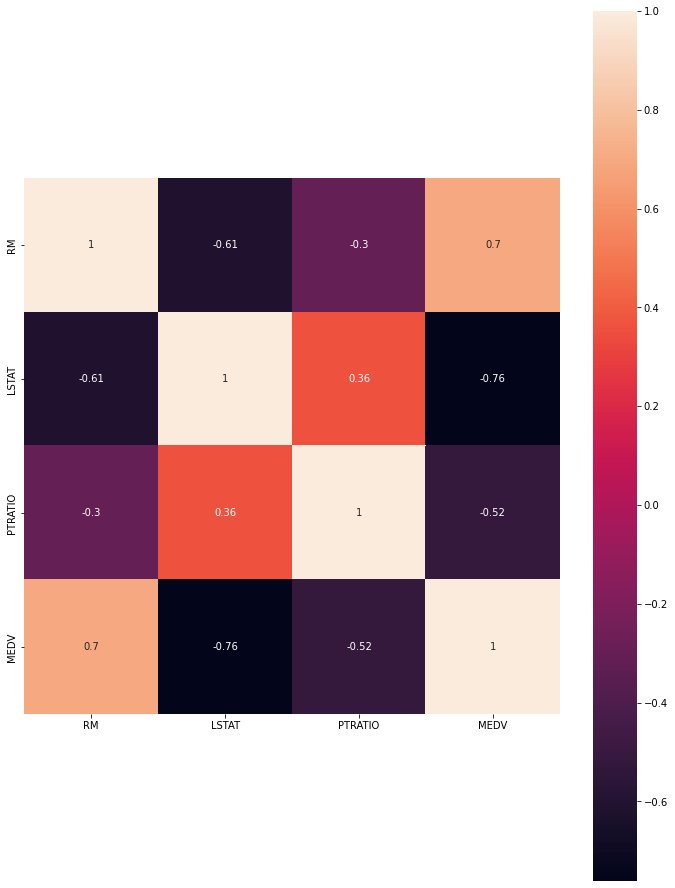

In [ ]:
#Mapa de Calor del DataFrame de las casas
plt.figure(figsize=(12, 16))
map_calor = sns.heatmap(data.corr(),square = True, annot = True)
map_calor

---

**La característica que tendremos en cuenta para el estudio serán los precios de las casas**



In [ ]:
#separamos datos de entrada y salida Casas
x_data = data.drop('MEDV', axis=1)
y_data = data['MEDV']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.75)

# **C** - Entrenamiento y Predicción

In [ ]:
arbol = DecisionTreeRegressor(criterion='squared_error', max_depth=2)
arbol.fit(x_train,y_train) 
y_predict = arbol.predict(x_test)

In [ ]:
x_data.columns.values

array(['RM', 'LSTAT', 'PTRATIO'], dtype=object)

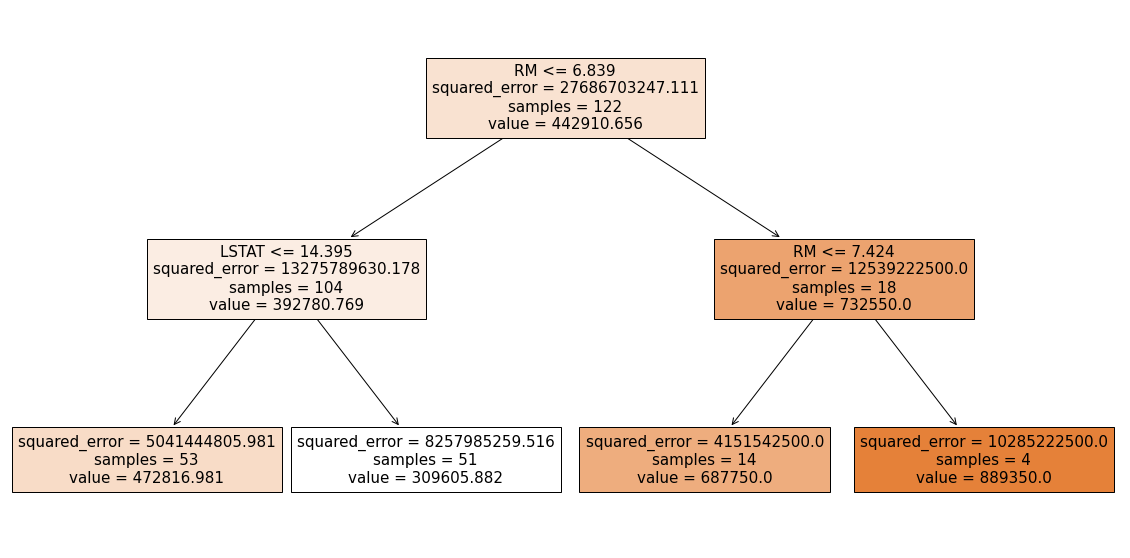

In [ ]:
y_data = y_data.astype(str)
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(arbol, feature_names = list(x_data.columns.values), class_names = list(y_data.values), filled = True)
plt.show()

In [ ]:
#Mostramos las características importantes que influyeron el las decisiones del árbol

for i in range(x_train.columns.shape[0]):
  print(x_train.columns[i],":",arbol.feature_importances_[i])

RM : 0.7327084424112185
LSTAT : 0.26729155758878154
PTRATIO : 0.0


In [ ]:
#@title Guardar el modelo de predicción ya entrenado usando dump
from joblib import dump, load
dump(arbol, 'modelo_DecisionTree_Housing.joblib')
!ls 

housing.csv  modelo_DecisionTree_Housing.joblib  sample_data


# ***D*** - Evaluación

## **Problemas de regresión**

In [ ]:
y_predict #Haremos una predicción

array([309605.88235294, 472816.98113208, 472816.98113208, 889350.        ,
       472816.98113208, 472816.98113208, 309605.88235294, 472816.98113208,
       309605.88235294, 472816.98113208, 472816.98113208, 472816.98113208,
       472816.98113208, 472816.98113208, 309605.88235294, 309605.88235294,
       472816.98113208, 472816.98113208, 472816.98113208, 687750.        ,
       472816.98113208, 472816.98113208, 309605.88235294, 472816.98113208,
       687750.        , 309605.88235294, 309605.88235294, 309605.88235294,
       309605.88235294, 472816.98113208, 687750.        , 472816.98113208,
       687750.        , 687750.        , 472816.98113208, 472816.98113208,
       472816.98113208, 472816.98113208, 889350.        , 472816.98113208,
       309605.88235294, 309605.88235294, 687750.        , 472816.98113208,
       309605.88235294, 472816.98113208, 472816.98113208, 472816.98113208,
       472816.98113208, 472816.98113208, 472816.98113208, 309605.88235294,
       472816.98113208, 6

### **Error cuadrático medio**

In [ ]:
arbol = DecisionTreeRegressor(criterion = 'squared_error', max_depth=8)
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.80)
arbol.fit(x_train,y_train)
y_predict = arbol.predict(x_test)

In [ ]:
prediccion_housing = pd.DataFrame({'RM':[6.120	], 'LSTAT':[9.08], 'PTRATIO':[21.0]})
arbol.predict(prediccion_housing)[0]

472816.9811320755

In [ ]:
print(mean_squared_error(y_predict, y_test)) #House

8460204420.275486


### **Error absoluto medio**

In [ ]:
print(mean_absolute_error(y_predict, y_test))#House

68825.26922855923


### **Representación gráfica**

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


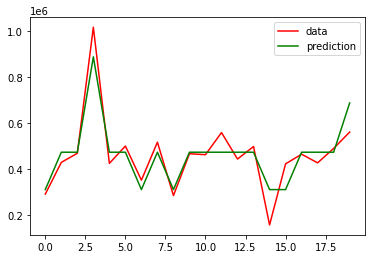

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[:20], c='r', label = 'data')
plt.plot(A,y_predict[:20], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


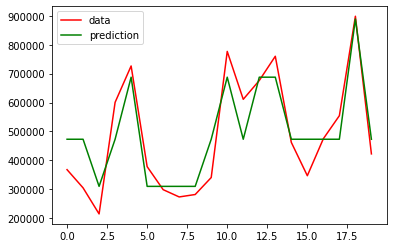

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[20:40], c='r', label = 'data')
plt.plot(A,y_predict[20:40], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


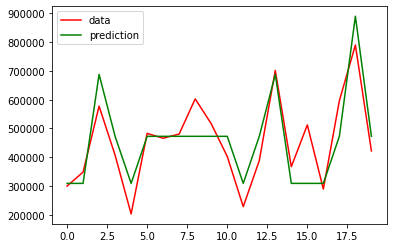

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[40:60], c='r', label = 'data')
plt.plot(A,y_predict[40:60], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()



---

# **E** - Optimización de hiperparámetros

## **Combinación de parámetros óptima**

## Calcula la combinación de parámetros óptima (uniform o distance; valor de k). Para ello realiza ejecuciones con cada uno de los valores uniform y distance para los valores de k desde 1 a 30.

In [ ]:
#Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits =5).
#Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)),
#como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

opt_squared_error = 0.0
opt_absolute_error = 0.0
k_opt_squared_error = 1
k_opt_absolute_error = 1

for i in range(1,15):
  k = i
  model = DecisionTreeRegressor(criterion = 'squared_error', max_depth=i)
  print(i)
  resultados_prob = []
  kf = KFold(n_splits=5) #Indicamos que se repetirá 5 veces
  for train, test in kf.split(x_data):
    x_train, x_test = x_data.iloc[train], x_data.iloc[test]
    y_train, y_test = y_data.iloc[train], y_data.iloc[test]
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    porcentage_squared_error = mean_absolute_error(y_test,y_predict)
    print(f'Score: {porcentage_squared_error}')
    resultados_prob.append(porcentage_squared_error) #Guardamos el porcentaje para hacer la media y tener un menor margen de error
  media_prob = statistics.mean(resultados_prob)
  print(f'Media: {media_prob}')

  if media_prob > opt_squared_error:
    opt_squared_error = media_prob
    print(opt_squared_error)
    k_opt_squared_error = k

for i in range(1,15):
  k = i
  model = DecisionTreeRegressor(criterion = 'absolute_error', max_depth=i)
  print(i)
  resultados_prob = []
  kf = KFold(n_splits=5) #Indicamos que se repetirá 5 veces
  for train, test in kf.split(x_data):
    x_train, x_test = x_data.iloc[train], x_data.iloc[test]
    y_train, y_test = y_data.iloc[train], y_data.iloc[test]
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    porcentage_absolute_error = mean_absolute_error(y_test,y_predict)
    print(f'Score: {porcentage_absolute_error}')
    resultados_prob.append(porcentage_absolute_error) #Guardamos el porcentaje para hacer la media y tener un menor margen de error
  media_prob = statistics.mean(resultados_prob)
  print(f'Media: {media_prob}')

  if media_prob > opt_absolute_error:
    opt_absolute_error = media_prob
    print(opt_absolute_error)
    k_opt_absolute_error = k

1
Score: 90890.30324514196
Score: 83169.60422528714
Score: 149657.4641422834
Score: 111787.69545131488
Score: 129974.29709465789
Media: 113095.87283173706
113095.87283173706
2
Score: 53783.050294004235
Score: 72013.21394492911
Score: 101554.13004341844
Score: 80777.87354775071
Score: 91586.63308341145
Media: 79942.98018270278
3
Score: 40333.19843239116
Score: 67366.90636479219
Score: 91354.2757163136
Score: 65806.85765615062
Score: 72272.0743081845
Media: 67426.66249556642
4
Score: 42540.87561621771
Score: 64539.03372821227
Score: 73596.52076675947
Score: 60578.933076787915
Score: 66343.40988770485
Media: 61519.754615136444
5
Score: 47484.59080220734
Score: 68810.9746545226
Score: 72091.743418681
Score: 60334.16309612335
Score: 65957.02968261794
Media: 62935.70033083045
6
Score: 54475.22699989086
Score: 69708.9432147617
Score: 71942.76617623793
Score: 60194.422353571004
Score: 64987.51134952384
Media: 64261.77401879707
7
Score: 59871.487476808914
Score: 76133.19618235245
Score: 71851.2

In [ ]:
print(k_opt_squared_error)
k_opt_absolute_error

5


4

### Imprimimos la probabilidad de acierto tanto de squared_error como absolute_error

In [ ]:
opt_squared_error

113095.87283173706

In [ ]:
opt_absolute_error

116058.55670103093

## Parámetros óptimos obtenidos

In [ ]:
#aplicamos los datos obtenidos al problema en cuestión
modelo_final = DecisionTreeRegressor(criterion = 'squared_error', max_depth=5)
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.80)
modelo_final.fit(x_train,y_train)
y_predict = modelo_final.predict(x_test)

# Error cuadrático medio
squared_error = mean_squared_error(y_test, y_predict)
# Error absoluto medio
absolute_error = mean_absolute_error(y_test, y_predict)

print('Estos son los resultados')
print('------------------------')
print('Error cuadrático medio: ', round(squared_error,2))
print('Error absoluto medio: ', round(absolute_error,2))

Estos son los resultados
------------------------
Error cuadrático medio:  10359896599.75
Error absoluto medio:  74374.5


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


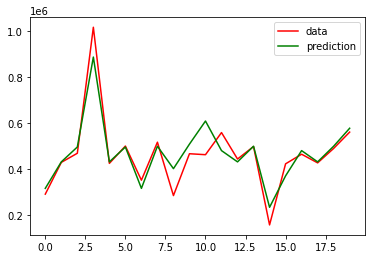

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[:20], c='r', label = 'data')
plt.plot(A,y_predict[:20], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


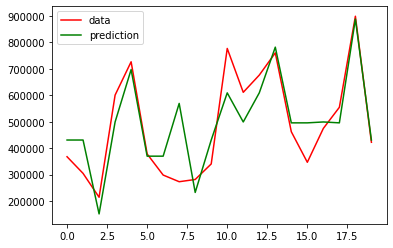

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[20:40], c='r', label = 'data')
plt.plot(A,y_predict[20:40], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


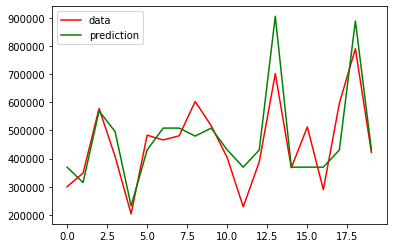

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[40:60], c='r', label = 'data')
plt.plot(A,y_predict[40:60], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

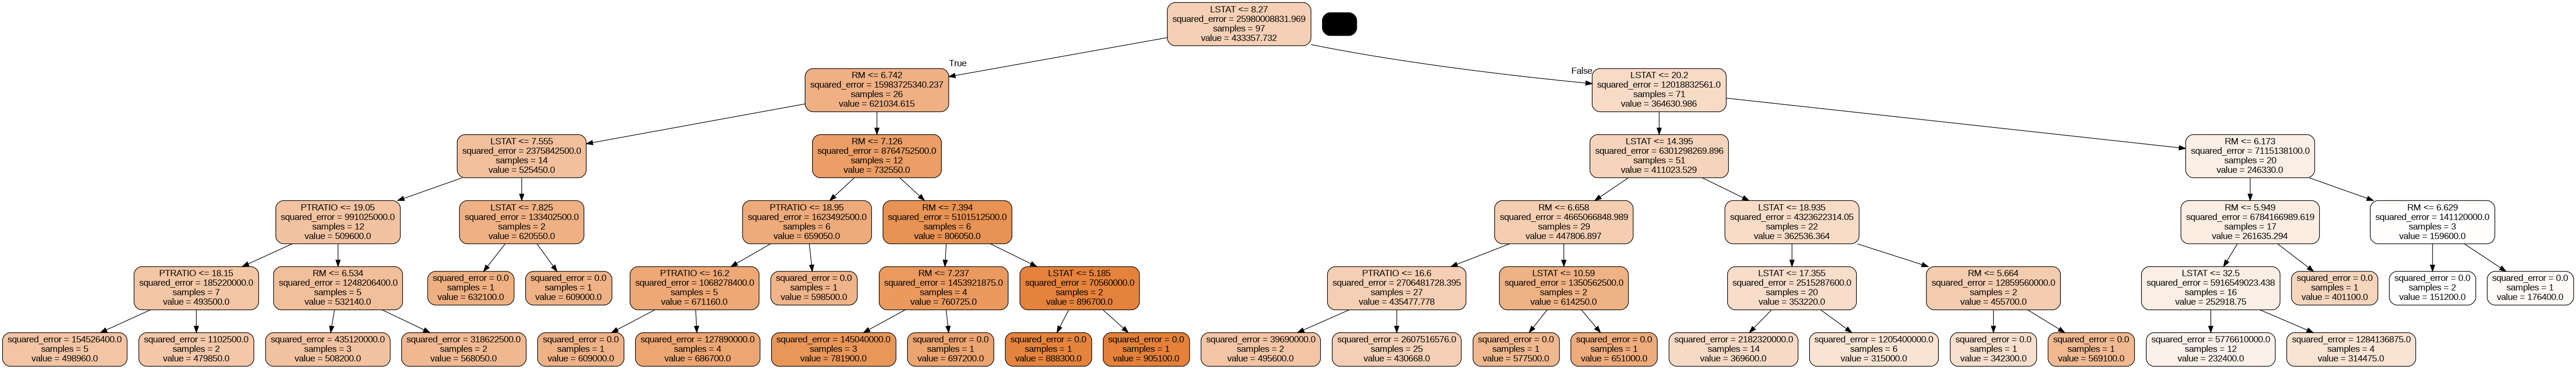

In [ ]:
dot_data = StringIO()

tree.export_graphviz(modelo_final, 
                     out_file= dot_data,
                     class_names=modelo_final.feature_names_in_.astype(str),
                     feature_names=x_train.columns,
                     rounded=True,
                     filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())